<a href="https://colab.research.google.com/github/Abhishek734/Deep-learning-practice/blob/master/cat-dog-classsification/Keras_CNN_model_for_cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [0]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt


from keras.preprocessing.image import load_img


## Define Variables

In [0]:
FAST_RUN = False
IMAGE_WIDTH =128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS =3

## Load the data from kaggle

In [1]:
from google.colab import files
files.upload()

# Let's make sure the kaggle.json file is present.
# !ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# Copy the stackoverflow data set locally.
# accept the terms and conditions 
!kaggle competitions download -c dogs-vs-cats

from zipfile import ZipFile

filename='train.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('done!')

filename='test1.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('done!')

Saving kaggle.json to kaggle.json
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 31.7MB/s]
 96% 259M/271M [00:07<00:00, 36.0MB/s]
100% 271M/271M [00:07<00:00, 38.7MB/s]
 98% 530M/543M [00:09<00:00, 52.3MB/s]
100% 543M/543M [00:10<00:00, 56.9MB/s]
done!
done!


## Prepare Training Data

In [0]:
filenames = os.listdir("train/")
categories = []

for filename in filenames:
    category = filename.split(".")[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filename,
    'category': categories
})

In [6]:
df.head()

,filename,category
0,dog.9522.jpg,1
1,dog.9522.jpg,0
2,dog.9522.jpg,1
3,dog.9522.jpg,1
4,dog.9522.jpg,0


## See total counts

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


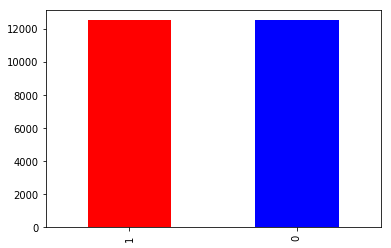

In [14]:
df['category'].value_counts().plot.bar(colors = ("red","blue"))

## lets see a sample data

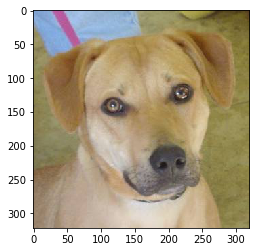

In [26]:

sample_img = random.choice(filenames)
img = load_img("train/" + sample_img)
plt.imshow(img)

## Building Keras CNN model


In [33]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense,Conv2D, Activation

model = Sequential()

input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

model.add(Conv2D(32, (3,3),activation = 'relu',input_shape= input_shape ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add((Dropout(0.25)))

model.add(Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)       

In [0]:
# help(Conv2D)